In [1]:
import mne
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import signal
from matplotlib.pyplot import figure
import scipy.signal
import neurokit2 as nk
import plotly.express as px
from shapely.geometry import Polygon
import plotly.graph_objects as go
from PIL import Image
from tqdm import tqdm

from func import *

---

# СОЗДАНИЕ POINTCLOUD ДАТАСЕТА:

In [8]:
path_dataset = '../dataset/Dataset_larger_1250/FULL_DATA'
total_shapes = []
for num in [2,3,4,5,6,7,8]:
    print('Период номер', num)
    shapes = []
    for filename in tqdm(os.listdir(path_dataset)):
        if filename.endswith('.edf'):  # Фильтр по типу файлов
            file_path = os.path.join(path_dataset, filename)
            input ={}
            input["data_edf"] = file_path
            input["n_term_start"] = num
            input["n_term_finish"] = None
            input["filt"] = True
            input["f_sreza"] = 0.7
            input["f_sampling"] = 1000
            input["logs"] = False
            input["show_ecg"] = False
            input["plot_3d"] = False
            input["qrs_loop_area"] = False
            input["t_loop_area"] = False
            input["count_qrst_angle"] = False
            input["save_coord"] = True
            input["predict"] = False
            input["mean_filter"] = False
            input["plot_projections"] = False
            input["pr_delta"] = 0.5
            input["show_xyz"] = False
            res = get_VECG(input)
            if type(res) == int:
                shapes.append(res)
    total_shapes.append(shapes)

Период номер 2


 27%|██▋       | 332/1250 [00:32<01:32,  9.94it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 448/1250 [00:43<01:19, 10.13it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [01:59<00:00, 10.48it/s]


Период номер 3


 27%|██▋       | 332/1250 [00:32<01:35,  9.58it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 448/1250 [00:43<01:17, 10.32it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [01:59<00:00, 10.48it/s]


Период номер 4


 27%|██▋       | 332/1250 [00:32<01:33,  9.80it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 448/1250 [00:43<01:18, 10.23it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [01:58<00:00, 10.51it/s]


Период номер 5


 27%|██▋       | 332/1250 [00:33<01:44,  8.81it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 449/1250 [00:45<01:19, 10.13it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [02:05<00:00,  9.95it/s]


Период номер 6


 27%|██▋       | 333/1250 [00:32<01:32,  9.88it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 448/1250 [00:42<01:17, 10.30it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [01:59<00:00, 10.46it/s]


Период номер 7


 26%|██▋       | 331/1250 [00:32<01:31, 10.01it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 448/1250 [00:44<01:19, 10.09it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [02:00<00:00, 10.34it/s]


Период номер 8


 27%|██▋       | 332/1250 [00:32<01:35,  9.61it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


 36%|███▌      | 448/1250 [00:43<01:18, 10.17it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1250/1250 [01:59<00:00, 10.44it/s]


Распределение числа точек в датасете для каждого пациента:

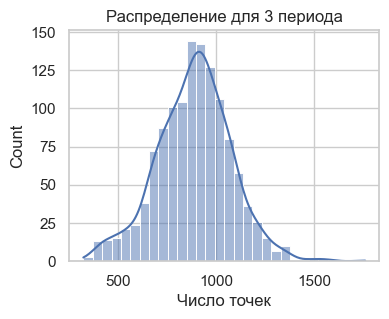

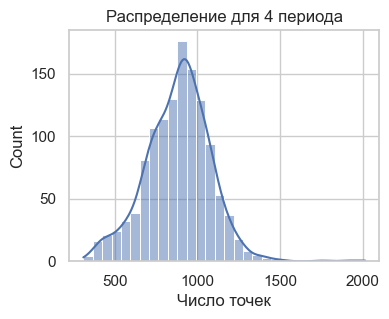

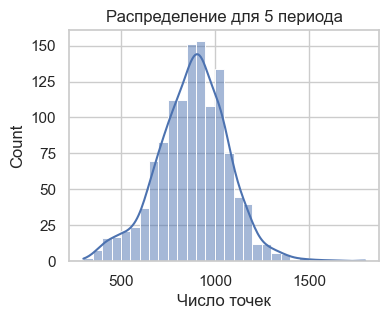

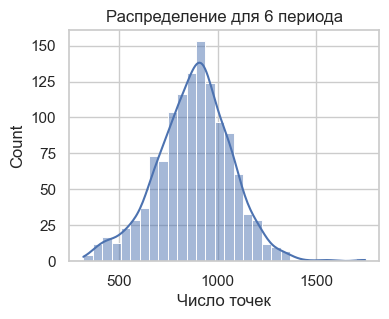

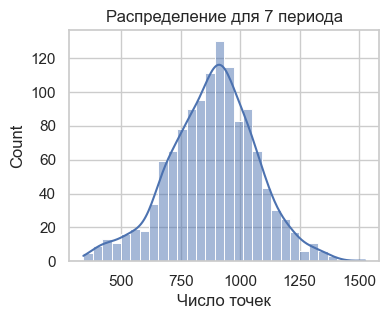

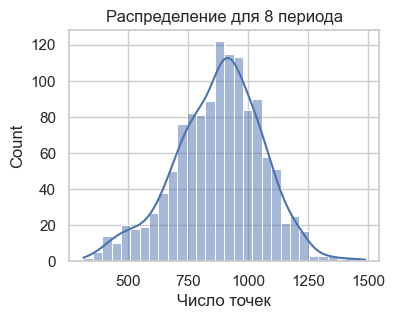

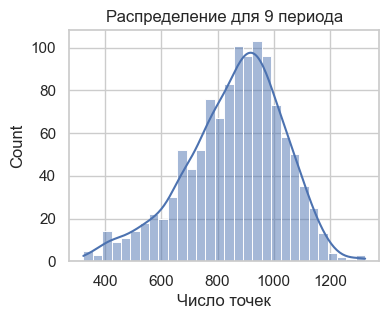

In [9]:
import seaborn as sns

for i in range(len(total_shapes)):
    sns.set(style="whitegrid")
    plt.figure(figsize=(4, 3))
    sns.histplot(x=total_shapes[i], kde=True, bins=30)
    plt.title(f"Распределение для {[3,4,5,6,7,8,9][i]} периода")
    plt.xlabel("Число точек")
    plt.show()

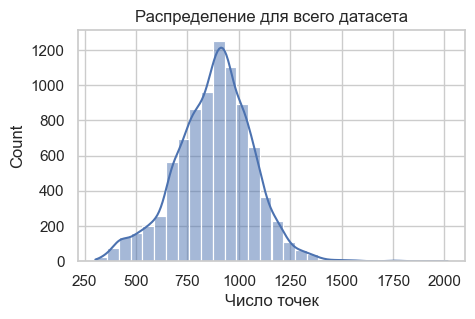

In [10]:
n_points = []
for num in total_shapes:
    n_points.extend(num)
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(x=n_points, kde=True, bins=30)
plt.title(f"Распределение для всего датасета")
plt.xlabel("Число точек")
plt.show()


In [11]:
data ={}
data["folder_dataset"] = 'point_cloud_dataset'
data["folder_save_csv"] = 'csv_folder_point_cloud'
data["auto_split"] = True
data["percent_error"] = 2
data["percent_train"] = 75
get_csv(data)

CSV таблица сохранена в папке csv_folder_point_cloud

Всего имеется 8668 кропов.
Для реализации пропорции 75/25 необходимо в файле csv_folder_point_cloud/info_dataset.csv отнести на валидацию (val) примерно 2167 кропов.

Выбран режим автоматического сплитования:
Условие рандомной генерации +-2% от требуемого 2167 числа кропов на валидацию - [2124,2210]

В результате автоматического сплитования получилось отнести на валидацию 2130 кропов
Итоговое соотношение train/val = 75/25


In [12]:
df = pd.read_excel('../dataset/1250_ef.xlsx')

def func_change(value):
    return value[:-4]

df['FileID'] = df.File.apply(func_change)
df.to_excel('../dataset/1250_ef.xlsx', index=False)
df

,File,EF,FileID
0,AG1.edf,68,AG1
1,AG10.edf,60,AG10
2,AG100.edf,65,AG100
3,AG101.edf,72,AG101
4,AG102.edf,70,AG102
...,...,...,...
1245,IOMI95.edf,65,IOMI95
1246,IOMI96.edf,38,IOMI96
1247,IOMI97.edf,54,IOMI97
1248,IOMI98.edf,67,IOMI98


In [13]:
data = {}
data["dataset_path"] = 'point_cloud_dataset'
data["splitted_dataset_name"] = 'final_pointcloud_dataset'
data["csv_folder"] = 'csv_folder_point_cloud'
data["excel_file"] = '../dataset/1250_ef.xlsx'
split(data)

Cоздано следующее число изображений:
На train - 6538
На val - 2130 

Итоговое соотношение train/val = 75/25

Разделенный датасет расположен в папке final_pointcloud_dataset


---